In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df_menus_cat = pd.read_csv('data/FOOD_CATEGORY_restaurant_menus_output.csv')
df_pivot_old = pd.read_csv('data/GEO_pivot_chosen_restaurants_statistics1.csv')
df_restaurants_cat = pd.read_csv('data/FOOD_CATEGORY_restaurants_output.csv')

In [4]:
df_menus_cat=df_menus_cat.drop(columns=['Unnamed: 0'])
df_menus_cat

,restaurant_id,category,name,description,price
0,28,Picked for you,Home Fries,NaN,4.78 USD
1,28,Picked for you,Hash Browns,NaN,4.78 USD
2,28,Picked for you,Orange Juice,NaN,4.32 USD
3,28,Picked for you,Tater Tots,NaN,4.78 USD
4,28,Breakfast Burritos,Build Your Own Burrito,Two scrambled eggs with your choice of meat an...,11.98 USD
...,...,...,...,...,...
33621,40221,Drinks,Mexican Coke,NaN,3.15 USD
33622,40221,Drinks,Jarritos,NaN,3.15 USD
33623,40221,Drinks,Topo Chico,NaN,3.15 USD
33624,40221,Drinks,Iced Tea,NaN,3.15 USD


In [5]:
# extract price to separate column
df_menus_cat['price_USD'] = df_menus_cat['price'].str.split(" ").str[-2]

#change price_int to numeric type
df_menus_cat.price_USD = pd.to_numeric(df_menus_cat.price_USD)

#deletong "price" column
df_menus_cat=df_menus_cat.drop(columns=['price'])
df_menus_cat.head(2)

,restaurant_id,category,name,description,price_USD
0,28,Picked for you,Home Fries,NaN,4.7800
1,28,Picked for you,Hash Browns,NaN,4.7800


In [6]:
#deleting items in menu cheaper then 3 USD
df_menus_cat = df_menus_cat.loc[(df_menus_cat['price_USD']>=3)]
df_menus_cat

,restaurant_id,category,name,description,price_USD
0,28,Picked for you,Home Fries,NaN,4.7800
1,28,Picked for you,Hash Browns,NaN,4.7800
2,28,Picked for you,Orange Juice,NaN,4.3200
3,28,Picked for you,Tater Tots,NaN,4.7800
4,28,Breakfast Burritos,Build Your Own Burrito,Two scrambled eggs with your choice of meat an...,11.9800
...,...,...,...,...,...
33621,40221,Drinks,Mexican Coke,NaN,3.1500
33622,40221,Drinks,Jarritos,NaN,3.1500
33623,40221,Drinks,Topo Chico,NaN,3.1500
33624,40221,Drinks,Iced Tea,NaN,3.1500


In [7]:
df_pivot_old = df_pivot_old.rename(columns={'stata / city':'State-City'})
df_pivot_old.head(2)

,Unnamed: 0,r_state,r_city,Cheap,Average,Expensive,Exclusive,All_rest,% of total,cummulative %,Population,Latitude,Longitude,rest vs pop %,men_per_1_rest,State-City
0,20,TX,DALLAS,197,70,6,2,275,0.7051,35.3374,1288457.0000,32.9398,-96.7491,0.0213,4685.2982,TX/DALLAS
1,17,VA,VIRGINIA BEACH,249,69,4,0,322,0.8256,33.0223,457672.0000,36.8445,-76.1449,0.0704,1421.3416,VA/VIRGINIA BEACH


In [8]:
pivot_menus = df_menus_cat.groupby('restaurant_id')['price_USD'].agg([np.mean,np.median,min,max])
pivot_menus=pivot_menus.reset_index()
pivot_menus

,restaurant_id,mean,median,min,max
0,28,8.6200,4.7800,3.0000,16.7800
1,43,9.3749,6.2950,3.4700,29.9900
2,68,9.4194,9.8900,3.2900,17.8800
3,106,8.1667,8.0000,3.0000,15.0000
4,108,11.9488,12.4900,5.0000,22.9900
...,...,...,...,...,...
545,40183,14.0312,15.9900,5.0000,24.0000
546,40188,5.8990,5.4500,3.1500,10.0000
547,40197,11.8354,14.3000,3.5900,18.2000
548,40199,7.8526,6.4250,3.1500,16.0000


In [9]:
df_restaurants_cat=df_restaurants_cat.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','min','max','mean','median'])
df_restaurants_cat.head(2)

,rm_restaurant_id,r_onlyname,r_city,r_state,r_score,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72


In [10]:
df_restaurants_cat=df_restaurants_cat.rename(columns={'rm_restaurant_id':'restaurant_id'})
df_restaurants_cat.head(2)

,restaurant_id,r_onlyname,r_city,r_state,r_score,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72


In [11]:
df_restaurants_cat_mrgd = pd.merge(df_restaurants_cat, pivot_menus, on="restaurant_id", how='left')

df_restaurants_cat_mrgd['city'] = df_restaurants_cat_mrgd['r_city'].str.upper()
df_restaurants_cat_mrgd['state'] = df_restaurants_cat_mrgd['r_state'].str.upper()

In [12]:
df_restaurants_cat_mrgd
df_restaurants_cat_mrgd['State-City'] = df_restaurants_cat_mrgd['state']+'/'+df_restaurants_cat_mrgd['city']

In [13]:
df_restaurants_cat_mrgd.head(2)

,restaurant_id,r_onlyname,r_city,r_state,r_score,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items,mean,median,min,max,city,state,State-City
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22,8.6200,4.7800,3.0000,16.7800,BIRMINGHAM,AL,AL/BIRMINGHAM
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72,9.3749,6.2950,3.4700,29.9900,BIRMINGHAM,AL,AL/BIRMINGHAM


In [14]:
pivot_restaurants_mexican = df_restaurants_cat_mrgd.pivot_table(values='count',index=['State-City'],columns='r_price_range',aggfunc=sum,fill_value=0)

pivot_restaurants_mexican.rename(columns={'$': 'Cheap', '$$' : 'Average', '$$$': 'Expensive','$$$$':'Exclusive'},inplace=True)
pivot_restaurants_mexican['All_restaurants']=pivot_restaurants_mexican['Cheap']+pivot_restaurants_mexican['Average']+pivot_restaurants_mexican['Expensive']
pivot_restaurants_mexican = pivot_restaurants_mexican.sort_values(['State-City'])
pivot_restaurants_mexican['Total_restaurants']=pivot_restaurants_mexican['Cheap']+pivot_restaurants_mexican['Average']
display(pivot_restaurants_mexican)

r_price_range,Cheap,Average,Expensive,All_restaurants,Total_restaurants
State-City,,,,,
AL/BIRMINGHAM,9,5,1,15,14
DC/WASHINGTON DC,82,26,5,113,108
OR/PORTLAND,82,33,2,117,115
TX/AUSTIN,48,30,1,79,78
UT/SALT LAKE CITY,58,15,2,75,73
VA/ARLINGTON,25,8,0,33,33
WA/SPOKANE,30,5,1,36,35
WI/MILWAUKEE,53,28,1,82,81


In [15]:
pivot_restaurants_mexican=pivot_restaurants_mexican.reset_index()
pivot_restaurants_mexican = pd.merge(pivot_restaurants_mexican, df_pivot_old, on='State-City', how='left')
pivot_restaurants_mexican.head(2)

,State-City,Cheap_x,Average_x,Expensive_x,All_restaurants,Total_restaurants,Unnamed: 0,r_state,r_city,Cheap_y,...,Expensive_y,Exclusive,All_rest,% of total,cummulative %,Population,Latitude,Longitude,rest vs pop %,men_per_1_rest
0,AL/BIRMINGHAM,9,5,1,15,14,30,AL,BIRMINGHAM,147,...,13,0,229,0.5871,41.5675,197575.0000,33.5624,-86.8307,0.1159,862.7729
1,DC/WASHINGTON DC,82,26,5,113,108,1,DC,WASHINGTON DC,880,...,108,21,1489,3.8176,8.2812,670050.0000,38.8999,-76.9956,0.2222,450.0000


In [16]:
for index, row in pivot_restaurants_mexican.iterrows():
    if pivot_restaurants_mexican.loc[index,'State-City'] =='AL/BIRMINGHAM':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'AL/ Birmingham'
    elif pivot_restaurants_mexican.loc[index,'State-City'] =='DC/WASHINGTON DC':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'DC/ Washington DC'
    elif pivot_restaurants_mexican.loc[index,'State-City'] =='OR/PORTLAND':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'OR/ Portland'
    elif pivot_restaurants_mexican.loc[index,'State-City'] =='TX/AUSTIN':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'TX/ Austin'
    elif pivot_restaurants_mexican.loc[index,'State-City'] =='UT/SALT LAKE CITY':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'UT/ Salt Lake City'
    elif pivot_restaurants_mexican.loc[index,'State-City'] =='VA/ARLINGTON':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'VA/ Arlington'
    elif pivot_restaurants_mexican.loc[index,'State-City'] =='WA/SPOKANE':
            pivot_restaurants_mexican.loc[index,'State/ City'] = 'WA/ Spokane'
    else:
        pivot_restaurants_mexican.loc[index,'State/ City'] = 'WI/ Milwaukee'

In [17]:
pivot_restaurants_mexican

,State-City,Cheap_x,Average_x,Expensive_x,All_restaurants,Total_restaurants,Unnamed: 0,r_state,r_city,Cheap_y,...,Exclusive,All_rest,% of total,cummulative %,Population,Latitude,Longitude,rest vs pop %,men_per_1_rest,State/ City
0,AL/BIRMINGHAM,9,5,1,15,14,30,AL,BIRMINGHAM,147,...,0,229,0.5871,41.5675,197575.0000,33.5624,-86.8307,0.1159,862.7729,AL/ Birmingham
1,DC/WASHINGTON DC,82,26,5,113,108,1,DC,WASHINGTON DC,880,...,21,1489,3.8176,8.2812,670050.0000,38.8999,-76.9956,0.2222,450.0000,DC/ Washington DC
2,OR/PORTLAND,82,33,2,117,115,4,OR,PORTLAND,613,...,9,926,2.3741,16.3906,641162.0000,45.5731,-122.5582,0.1444,692.3996,OR/ Portland
3,TX/AUSTIN,48,30,1,79,78,6,TX,AUSTIN,419,...,1,692,1.7742,20.2928,964177.0000,32.4629,-96.8419,0.0718,1393.3194,TX/ Austin
4,UT/SALT LAKE CITY,58,15,2,75,73,10,UT,SALT LAKE CITY,367,...,2,540,1.3845,26.1460,200478.0000,40.7631,-111.8771,0.2694,371.2556,UT/ Salt Lake City
5,VA/ARLINGTON,25,8,0,33,33,8,VA,ARLINGTON,400,...,6,571,1.4640,23.3386,236434.0000,38.8492,-77.0841,0.2415,414.0701,VA/ Arlington
6,WA/SPOKANE,30,5,1,36,35,13,WA,SPOKANE,272,...,1,387,0.9922,29.3560,229071.0000,47.6671,-117.3963,0.1689,591.9147,WA/ Spokane
7,WI/MILWAUKEE,53,28,1,82,81,7,WI,MILWAUKEE,405,...,0,617,1.5819,21.8747,569330.0000,42.9480,-87.9488,0.1084,922.7391,WI/ Milwaukee


In [18]:
data = pivot_restaurants_mexican[['State/ City','Total_restaurants','Population','men_per_1_rest']]
data = data.rename(columns={'Total_restaurants':'Total no restaurants','men_per_1_rest':'People per 1 restaurant'})
data = data.sort_values('Total no restaurants')
data

,State/ City,Total no restaurants,Population,People per 1 restaurant
0,AL/ Birmingham,14,197575.0000,862.7729
5,VA/ Arlington,33,236434.0000,414.0701
6,WA/ Spokane,35,229071.0000,591.9147
4,UT/ Salt Lake City,73,200478.0000,371.2556
3,TX/ Austin,78,964177.0000,1393.3194
7,WI/ Milwaukee,81,569330.0000,922.7391
1,DC/ Washington DC,108,670050.0000,450.0000
2,OR/ Portland,115,641162.0000,692.3996


In [19]:
labels_bar = data["Total no restaurants"]
labels_scatter = data['People per 1 restaurant']
x=data['State/ City']
y=data['Population']

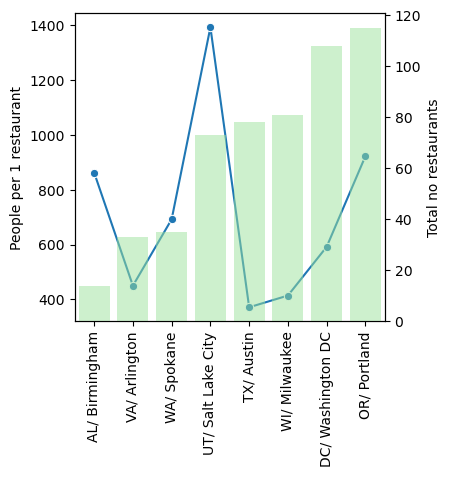

In [20]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(4,4))

sns.lineplot(data = data['People per 1 restaurant'], marker='o',  ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = data, x='State/ City', y='Total no restaurants', alpha=0.5, color= 'lightgreen', ax=ax2)
ax1.tick_params(axis='x', rotation=90)

In [21]:
df_restaurants_cat.head()

,restaurant_id,r_onlyname,r_city,r_state,r_score,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72
2,68,Los Arcos Mexican Restaurant,birmingham,al,4.3000,100.0000,"mexican, salads, tacos",$,33.5281,-86.7287,1,AL/BIRMINGHAM,145
3,106,Taqueria La Herradura,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, soup",$,33.5346,-86.8429,1,AL/BIRMINGHAM,30
4,108,Cabo Coastal Grill,birmingham,al,NaN,NaN,"mexican, latin american, new mexican",$$,33.4384,-86.8661,1,AL/BIRMINGHAM,72


In [22]:
for index, row in df_restaurants_cat.iterrows():
    if df_restaurants_cat.loc[index,'state_city'] =='AL/BIRMINGHAM':
            df_restaurants_cat.loc[index,'State/ City'] = 'AL/ Birmingham'
    elif df_restaurants_cat.loc[index,'state_city'] =='DC/WASHINGTON DC':
            df_restaurants_cat.loc[index,'State/ City'] = 'DC/ Washington DC'
    elif df_restaurants_cat.loc[index,'state_city'] =='OR/PORTLAND':
            df_restaurants_cat.loc[index,'State/ City'] = 'OR/ Portland'
    elif df_restaurants_cat.loc[index,'state_city'] =='TX/AUSTIN':
            df_restaurants_cat.loc[index,'State/ City'] = 'TX/ Austin'
    elif df_restaurants_cat.loc[index,'state_city'] =='UT/SALT LAKE CITY':
            df_restaurants_cat.loc[index,'State/ City'] = 'UT/ Salt Lake City'
    elif df_restaurants_cat.loc[index,'state_city'] =='VA/ARLINGTON':
            df_restaurants_cat.loc[index,'State/ City'] = 'VA/ Arlington'
    elif df_restaurants_cat.loc[index,'state_city'] =='WA/SPOKANE':
            df_restaurants_cat.loc[index,'State/ City'] = 'WA/ Spokane'
    elif df_restaurants_cat.loc[index,'state_city'] =='WI/MILWAUKEE':
        df_restaurants_cat.loc[index,'State/ City'] = 'WI/ Milwaukee'

df_restaurants_cat.head(2)

,restaurant_id,r_onlyname,r_city,r_state,r_score,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items,State/ City
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22,AL/ Birmingham
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72,AL/ Birmingham


In [23]:
df_scores = df_restaurants_cat.loc[df_restaurants_cat['r_price_range'] != '$$$']
df_scores.head(2)

,restaurant_id,r_onlyname,r_city,r_state,r_score,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items,State/ City
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22,AL/ Birmingham
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72,AL/ Birmingham


In [24]:
df_scores=df_scores.rename(columns={'r_score':'Scores'})
df_scores.head(2)

,restaurant_id,r_onlyname,r_city,r_state,Scores,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items,State/ City
0,28,Sunny Fines Breakfast Burritos,birmingham,al,NaN,NaN,"mexican, breakfast and brunch, burritos",$,33.5098,-86.8546,1,AL/BIRMINGHAM,22,AL/ Birmingham
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72,AL/ Birmingham


In [25]:
df_scores_data = df_scores.dropna(subset='Scores')
df_scores_data.head(2)

,restaurant_id,r_onlyname,r_city,r_state,Scores,r_ratings,r_category,r_price_range,r_lat,r_lng,count,state_city,menu_items,State/ City
1,43,Taco Bell,birmingham,al,4.1000,91.0000,"burritos, fast food, mexican",$,33.4979,-86.8758,1,AL/BIRMINGHAM,72,AL/ Birmingham
2,68,Los Arcos Mexican Restaurant,birmingham,al,4.3000,100.0000,"mexican, salads, tacos",$,33.5281,-86.7287,1,AL/BIRMINGHAM,145,AL/ Birmingham


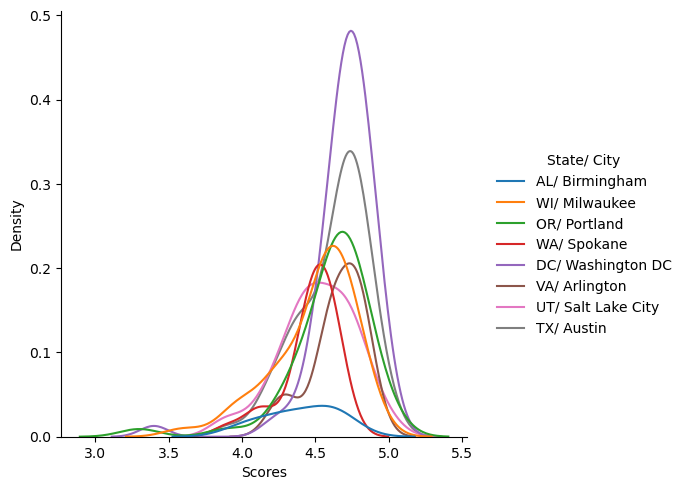

In [26]:
sns.displot(data=df_scores_data, x="Scores", hue="State/ City", kind="kde")

In [27]:
df_mexican_avg_score = pd.DataFrame(df_restaurants_cat_mrgd.groupby('State-City')['r_score'].mean())
df_mexican_avg_score = df_mexican_avg_score.rename(columns={'r_score':'Average_score'})
display(df_mexican_avg_score)

,Average_score
State-City,
AL/BIRMINGHAM,4.4300
DC/WASHINGTON DC,4.6958
OR/PORTLAND,4.6022
TX/AUSTIN,4.6220
UT/SALT LAKE CITY,4.5093
VA/ARLINGTON,4.6500
WA/SPOKANE,4.4630
WI/MILWAUKEE,4.4913


In [28]:
df_rest_mex_mrgd = pd.merge(pivot_restaurants_mexican, df_mexican_avg_score, on="State-City", how='left')

In [30]:
df_rest_mex_mrgd = df_rest_mex_mrgd.reset_index()
df_rest_mex_mrgd.head(2)

,level_0,index,State-City,Cheap_x,Average_x,Expensive_x,All_restaurants,Total_restaurants,Unnamed: 0,r_state,...,All_rest,% of total,cummulative %,Population,Latitude,Longitude,rest vs pop %,men_per_1_rest,State/ City,Average_score
0,0,0,AL/BIRMINGHAM,9,5,1,15,14,30,AL,...,229,0.5871,41.5675,197575.0000,33.5624,-86.8307,0.1159,862.7729,AL/ Birmingham,4.4300
1,1,1,DC/WASHINGTON DC,82,26,5,113,108,1,DC,...,1489,3.8176,8.2812,670050.0000,38.8999,-76.9956,0.2222,450.0000,DC/ Washington DC,4.6958


In [31]:
df_mexican_min_max = df_restaurants_cat_mrgd.groupby('State-City')['mean'].agg([min,max])
df_mexican_min_max = df_mexican_min_max.rename(columns={'min':'Minimal_price','max':'Maximal_price'})
display(df_mexican_min_max)

,Minimal_price,Maximal_price
State-City,,
AL/BIRMINGHAM,6.9100,17.1977
DC/WASHINGTON DC,5.2333,23.6765
OR/PORTLAND,3.0000,17.8392
TX/AUSTIN,4.4615,20.3547
UT/SALT LAKE CITY,4.8529,17.2257
VA/ARLINGTON,5.9608,19.1867
WA/SPOKANE,5.3133,19.1107
WI/MILWAUKEE,3.2500,23.6824


In [34]:
df_rest_mex_mrgd = pd.merge(df_rest_mex_mrgd, df_mexican_min_max, on="State-City", how='left')
df_rest_mex_mrgd.head(2)

,level_0,index,State-City,Cheap_x,Average_x,Expensive_x,All_restaurants,Total_restaurants,Unnamed: 0,r_state,...,Latitude,Longitude,rest vs pop %,men_per_1_rest,State/ City,Average_score,Minimal_price_x,Maximal_price_x,Minimal_price_y,Maximal_price_y
0,0,0,AL/BIRMINGHAM,9,5,1,15,14,30,AL,...,33.5624,-86.8307,0.1159,862.7729,AL/ Birmingham,4.4300,6.9100,17.1977,6.9100,17.1977
1,1,1,DC/WASHINGTON DC,82,26,5,113,108,1,DC,...,38.8999,-76.9956,0.2222,450.0000,DC/ Washington DC,4.6958,5.2333,23.6765,5.2333,23.6765


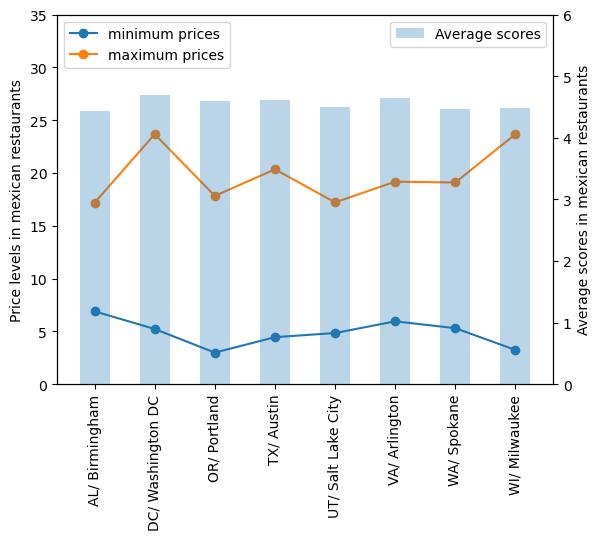

In [33]:
x = df_rest_mex_mrgd['State/ City']
min_price_levels = df_rest_mex_mrgd['Minimal_price']
max_price_levels = df_rest_mex_mrgd['Maximal_price']
average_score = df_rest_mex_mrgd['Average_score']

# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(x, min_price_levels, 'o-', max_price_levels, 'o-') 
plt.xticks(rotation=90)
ax1.set_ylabel('Price levels in mexican restaurants')
ax1.set_ylim(0, 35)
ax1.legend(['minimum prices', 'maximum prices'], loc="upper left")


#ax3.plot(x, max_price_levels)
#ax3.set_ylabel('maximum price levels')
#ax3.set_ylim(0, 45)
#ax3.legend(['maximum_prices'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(x, average_score, width=0.5, alpha=0.3)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Average scores in mexican restaurants')
ax2.set_ylim(0, 6)
ax2.legend(['Average scores'], loc="upper right")
plt.xticks(rotation=90)
plt.show()